# Task 1: House Price Prediction

***Problem Statement*** : Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.

***Metric***: Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.

***Objective*** :

* Understand the Dataset & Creative feature engineering .
* Advanced regression techniques like random forest and gradient boosting.
* Also evaluate the models & compare thier respective scores like R2, RMSE, etc.

***Dataset***:

The dataset used is [House Prices - Advanced Regression Techniques]('https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview') from Kaggle. The dataset is small yet, it's complexity arises due to the fact that it has strong multicollinearity.

***Methodology***:

The following steps are adapted to perform the prediction of housing price:

1. Data collection and exploration
2. Exploratory Data Analysis (EDA)
3. Data Preprocessing
4. Feature Engineering
5. Model training
6. Model Evaluation

## 1. Data Collection and Exploration

This step involves loading of dataset and exploring data and columns.

In [33]:

import math
import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

from IPython.display import display


from statsmodels.formula import api
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [34]:
# load the training and testing datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [35]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [36]:
display(train_df.info())
display(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

None

In [37]:
# Remove 'Id' column
train_df = train_df.drop(['Id'], axis=1)

test_ids=test_df["Id"]

test_df = test_df.drop(['Id'], axis=1)

# Choose features and target of the model
target = 'SalePrice'
features = [i for i in train_df.columns if i not in [target]]

# Summary of Training and Testing data
print('The Training Datset consists of {} columns & {} samples.'.format(train_df.shape[1], train_df.shape[0]))
print('The Testing Datset consists of {} columns & {} samples.\n'.format(test_df.shape[1], test_df.shape[0]))
print('Features: {}\n'.format(features))
print('Target: {}\n'.format(target))
print(f'Length of Features: {len(features)}')

The Training Datset consists of 80 columns & 1460 samples.
The Testing Datset consists of 79 columns & 1459 samples.

Features: ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 

## 2. Exploratory Data Analysis (EDA)

In order to understnad the data, let's explore key features in the dataset.

1. OverallQual
2. LotFrontage
3. LotArea
4. GarageArea
5. TotalBsmtSF
6. GrLivArea
7. GarageArea
8. 1stFlrSF


### Visualisation of Target Variable


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


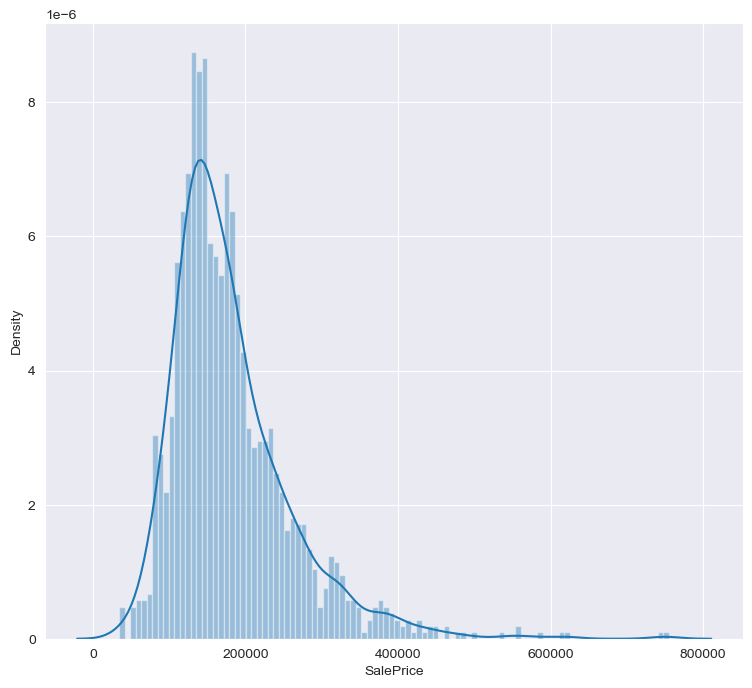

In [38]:
print(train_df[target].describe())
plt.figure(figsize=(9, 8))
sns.distplot(train_df[target], bins=100);

### Bivariate Analysis

#### 1. Relationship with OverallQual

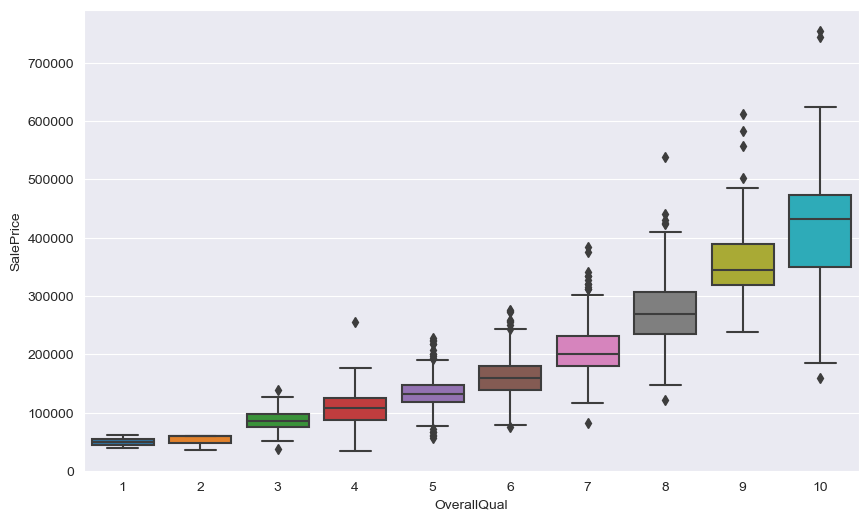

In [39]:
var = 'OverallQual'
fig = sns.boxplot(x=var, y="SalePrice", data=train_df)

#### 2. Relationship with LotFrontage

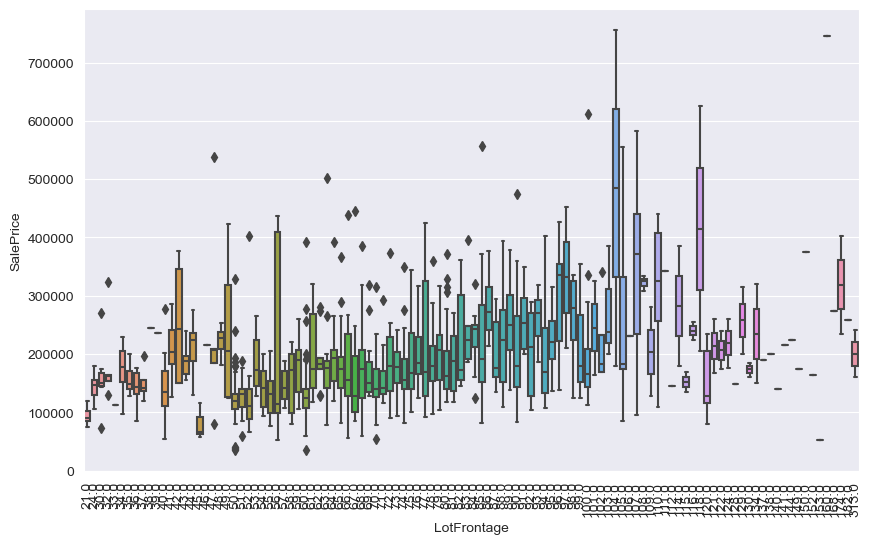

In [41]:
var = 'LotFrontage'
sns.boxplot(x=var, y="SalePrice", data=train_df)
plt.xticks(rotation=90);

#### 1. Relationship with LotArea

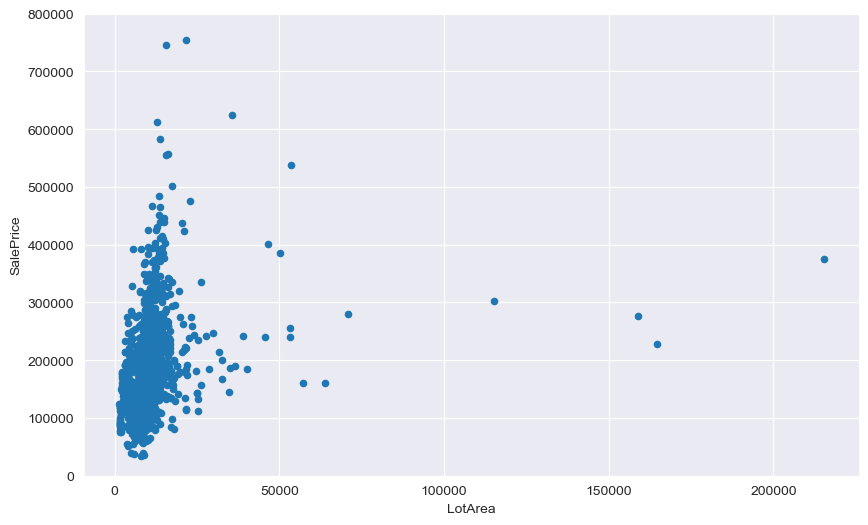

In [42]:
var = 'LotArea'
train_df.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#### 3. Relationship with GrLivArea

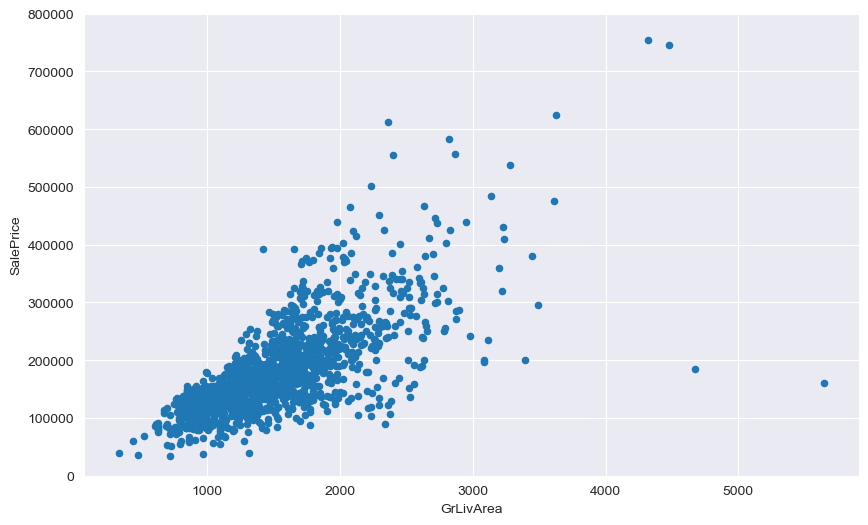

In [43]:
var = 'GrLivArea'
train_df.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#### 4. Relationship with GarageArea


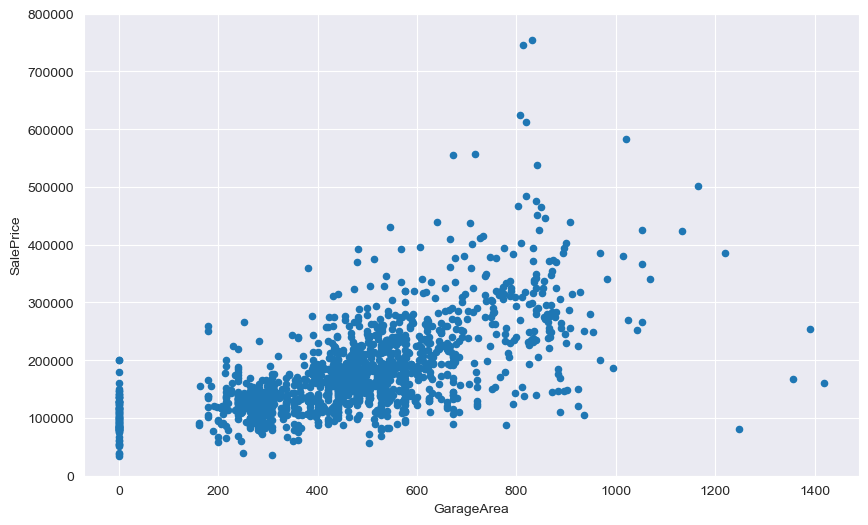

In [44]:
var = 'GarageArea'
train_df.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#### 5. Relationship with 1stFlrSF


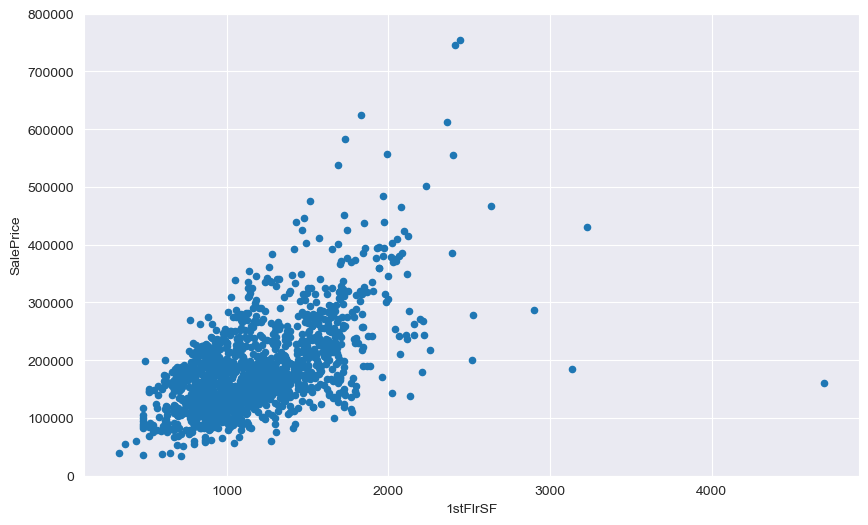

In [45]:
var = '1stFlrSF'
train_df.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

## 3. Data Preprocessing

### a. Handling missing values


In [46]:
# Check for missing values
missing_values_train = train_df.isnull().sum()
missing_values_train = missing_values_train[missing_values_train > 0]
print('In Training data, number of columns with missing values: {}\n'.format(len(missing_values_train)))
print(missing_values_train)

missing_values_test = test_df.isnull().sum()
missing_values_test = missing_values_test[missing_values_test > 0]
print('\n\nIn Testing data, number of columns with missing values: {}\n'.format(len(missing_values_test)))
print(missing_values_test)

In Training data, number of columns with missing values: 19

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In Testing data, number of columns with missing values: 33

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
Gar

Training dataset consists of 19 columns with missing data whereas testing data has 33 columns. Let's drop the common features in both dataset with highst missing values (greater than 5).

In [47]:
# Find dropping columns
drop_train = missing_values_train[missing_values_train > 5].index
print('In Training data, number of columns with missing values greater than 5: {}\n'.format(len(drop_train)))

drop_test = missing_values_test[missing_values_test > 5].index
print('In Testing data, number of columns with missing values greater than 5: {}\n'.format(len(drop_test)))

# Check for commonality between dropping features
if drop_train.all() == drop_test.all():
    print('The columns to be dropped: {}'.format(list(drop_test)))

In Training data, number of columns with missing values greater than 5: 18

In Testing data, number of columns with missing values greater than 5: 18

The columns to be dropped: ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [48]:
# Drop the common features from both dataset
train_df.drop(drop_train, axis=1, inplace=True)
test_df.drop(drop_test, axis=1, inplace=True)

print('Training Data:')
display(train_df.head(5))
display(train_df.shape)
print('Testing Data:')
display(test_df.head(5))
display(test_df.shape)

Training Data:


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


(1460, 62)

Testing Data:


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,...,82,0,0,144,0,0,1,2010,WD,Normal


(1459, 61)

In [49]:
# Handling undropped columns

# Find remaining missing value columns
no_drop_train = missing_values_train[missing_values_train < 5].index.tolist()
print('In Training data, number of columns with missing values lesser than 5: {}'.format(len(drop_train)))
print(no_drop_train)

no_drop_test = missing_values_test[missing_values_test < 5].index.tolist()
print('\nIn Testing data, number of columns with missing values lesser than 5: {}'.format(len(drop_test)))
print(no_drop_test)

In Training data, number of columns with missing values lesser than 5: 18
['Electrical']

In Testing data, number of columns with missing values lesser than 5: 18
['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea', 'SaleType']


In [50]:
train_df['Electrical'].fillna(train_df['Electrical'].mode()[0], inplace=True)

# Handle missing numeric values (fill with mean)
numeric_cols_with_missing = test_df[no_drop_test].select_dtypes(exclude='object')
for col in numeric_cols_with_missing:
    test_df[col].fillna(test_df[col].mean(), inplace=True)

# Handle missing categorical values (fill with 'Missing' category)
categorical_cols_with_missing = test_df[no_drop_test].select_dtypes(include='object')
for col in categorical_cols_with_missing:
    test_df[col].fillna(test_df[col].mode()[0], inplace=True)

print('Training Data:')
display(train_df.head(5))
display(train_df.shape)
print('Testing Data:')
display(test_df.head(5))
display(test_df.shape)

Training Data:


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


(1460, 62)

Testing Data:


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,...,82,0,0,144,0,0,1,2010,WD,Normal


(1459, 61)

### b. Handling Duplicate values

In [51]:
# Check for duplicate values
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

### c. Handling Categorical Features

In [52]:
# Separate categorical and numerical features
categorical_features = train_df.select_dtypes(include=['object']).columns.tolist()
numerical_features = train_df.select_dtypes(exclude=['object']).columns.tolist()

# Print the lists of categorical and numerical features
print("Categorical Features:")
print(categorical_features)

print("\nNumerical Features:")
print(numerical_features)

Categorical Features:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']

Numerical Features:
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [53]:
lb = LabelEncoder()
for feature in categorical_features:
    train_df[feature] = lb.fit_transform(train_df[feature])
    test_df[feature] = lb.fit_transform(test_df[feature])


### d. Data Splitting

In [54]:
# Compute training and testing data
target = 'SalePrice'
features = [i for i in train_df.columns if i not in [target]]
train_X = train_df[features]
train_Y = train_df[target]
Test_X = test_df[features]

# Split data into training and validation data
Train_X, Val_X, Train_Y, Val_Y = train_test_split(train_X, train_Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Training dataset:',Train_X.shape,Train_Y.shape)
print('Validation set:', Val_X.shape, Val_Y.shape)
print('Testing set:', Test_X.shape)

Training dataset: (1168, 61) (1168,)
Validation set: (292, 61) (292,)
Testing set: (1459, 61)


In [55]:
numerical_features = Train_X.columns

# Function to remove outliers
def remove_outliers(df):

    # Detect features with outliers
    plt.figure(figsize=[10,3*math.ceil(len(numerical_features)/2)])
    for i in range(len(numerical_features)):
        plt.subplot(math.ceil(len(numerical_features)/2),2,i+1)
        train_df.boxplot(numerical_features[i])

    plt.show()

    # Remove Outliers
    for i in numerical_features:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        df1 = df[df[i] <= (Q3+(1.5*IQR))]
        df1 = df[df[i] >= (Q1-(1.5*IQR))]
        df1 = df.reset_index(drop=True)


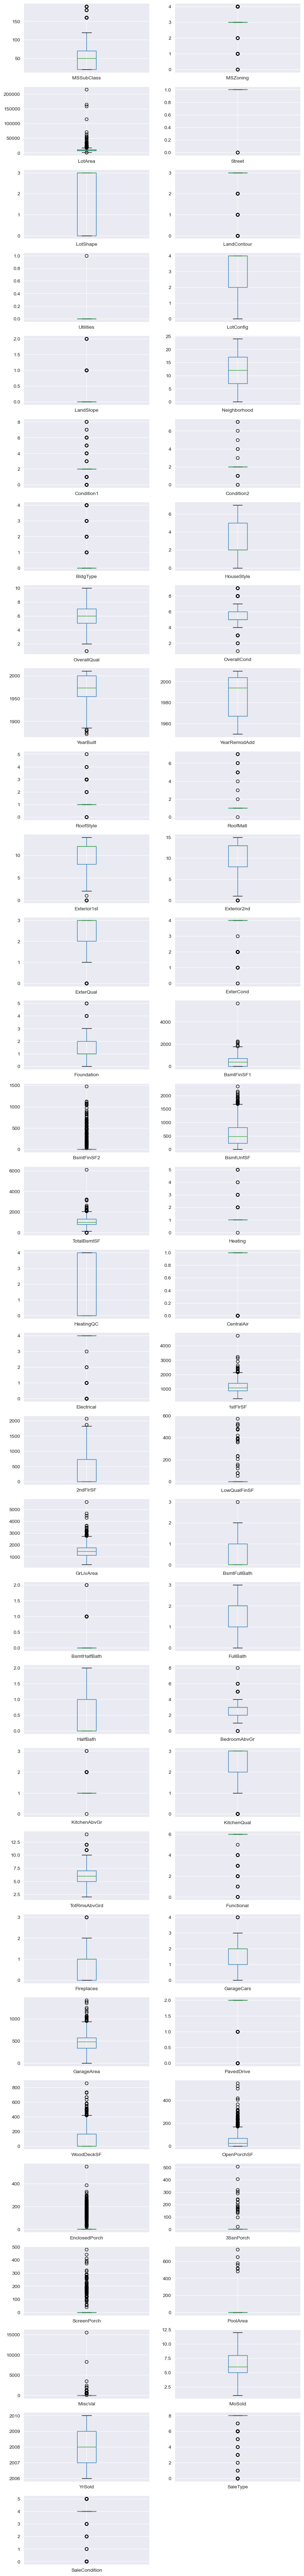

The Training dataset consists of 61 columns & 1460 samples.



In [56]:
# Remove outliers from Training dataset
remove_outliers(train_X)
print('The Training dataset consists of {} columns & {} samples.\n'.format(train_X.shape[1], train_X.shape[0]))

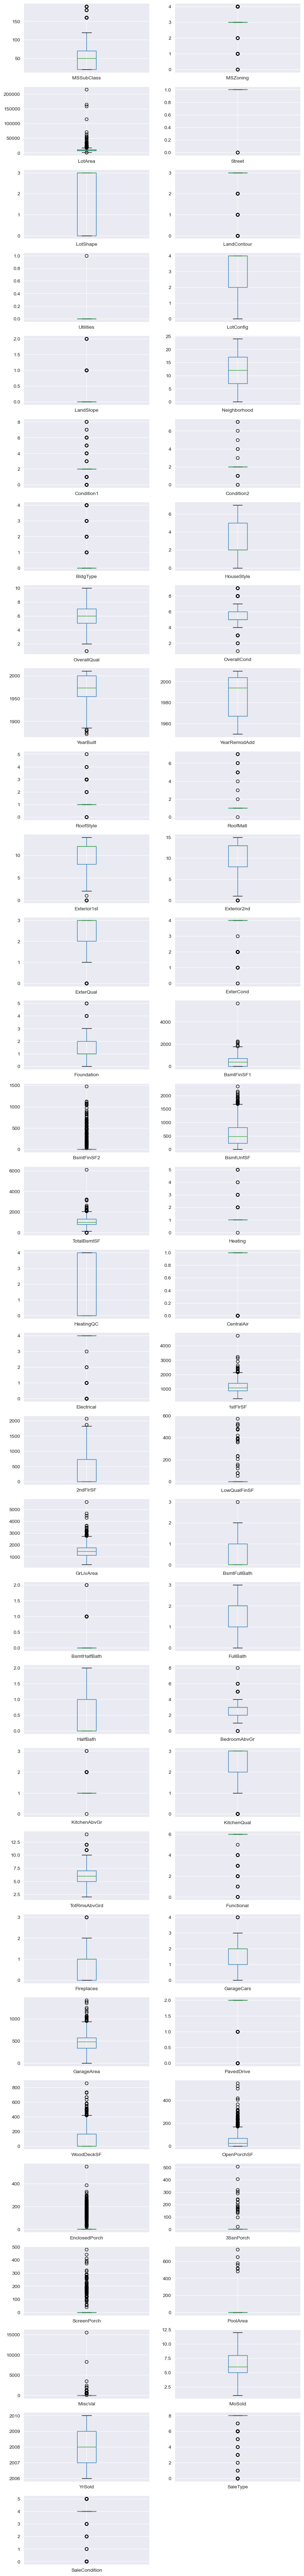

The Testing dataset consists of 61 columns & 1459 samples.



In [57]:
# Remove outliers from Testing dataset
remove_outliers(Test_X)
print('The Testing dataset consists of {} columns & {} samples.\n'.format(Test_X.shape[1], Test_X.shape[0]))

### d. Scaling

In [58]:
# Scaling features using Z-score normalization
std = StandardScaler()
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=Train_X.columns)

Val_X_std = std.fit_transform(Val_X)
Val_X_std = pd.DataFrame(Val_X_std, columns=Val_X.columns)


Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=Test_X.columns)


## 4. Feature Engineering

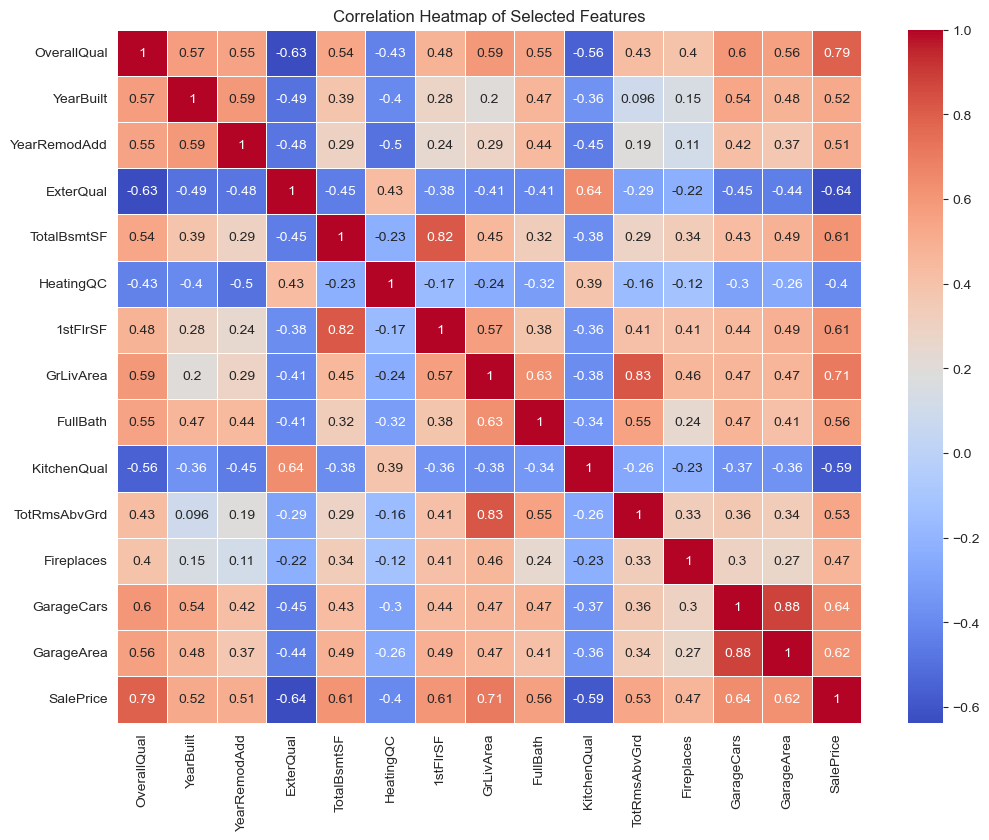

In [59]:
#correlation matrix
corrmat = train_df.corr()

# Set the correlation threshold (you can adjust this as needed)
correlation_threshold = 0.4

# Filter the features with moderate to high correlation with respect to the target
target_correlation = corrmat['SalePrice']
key_features = target_correlation[(target_correlation > correlation_threshold) | (target_correlation < -correlation_threshold)].index

# Create a heatmap of the selected features
plt.figure(figsize=(12, 9))
sns.heatmap(train_df[key_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Selected Features")
plt.show()

## 5. Model Training

In [60]:
Train_X_std.shape,Train_Y.shape

((1168, 61), (1168,))

In [75]:
model=RandomForestRegressor(n_estimators=150)
model.fit(Train_X_std, Train_Y)
train_pred = model.predict(Train_X_std)
val_pred=model.predict(Val_X_std)

In [76]:
print("R2 Score for Train : {} ".format(r2_score(Train_Y,train_pred)))
print("RMSE for train: {}".format(np.sqrt(mean_squared_error(Train_Y,train_pred))))

print("R2 Score for validation : {} ".format(r2_score(Val_Y,val_pred)))
print("RMSE for validation: {}".format(np.sqrt(mean_squared_error(Val_Y,val_pred))))

R2 Score for Train : 0.9811711977740941 
RMSE for train: 10870.380011724283
R2 Score for validation : 0.8901571073840797 
RMSE for validation: 26574.233034834433
